## Prevendo o preço de uma casa <br>Predicting the Price of a house

In [253]:
import pandas as pd

df = pd.read_excel('AmesHousing.xls')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


#### Checando a situação dos dados do dataset <br> Checking the situation of the dataset data

In [208]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
# profile = ProfileReport(df, title='Profiling Diabets',html={'style':{'full_width':True}})
# profile

C:\Users\marcel.pinheiro\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


#### Removendo features com mais de 80% de valores nulos ou zeros <br> Removing features with 80% or more null values or zeros

In [254]:
df = df.drop(['Pool Area' ,'Pool QC' ,'3Ssn Porch' ,'Low Qual Fin SF' ,'Misc Val' ,'Misc Feature' ,'Bsmt Half Bath' ,'Alley'
         ,'Screen Porch' ,'BsmtFin SF 2' ,'Enclosed Porch' ,'Fence'], axis=1)

#### Convertendo features texto para números para verificar a correlação, variancia, e etc <br> Converting the text features into numbers to verify correlaton, variation, etc

In [257]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.dropna()
df = df.apply(le.fit_transform)
df



,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,0,0,3,107,894,1,0,3,0,...,3,4,1,127,51,4,4,8,3,299
3,1,6,0,3,69,512,1,3,3,0,...,3,4,2,0,0,3,4,8,3,354
4,2,12,5,3,50,739,1,0,3,0,...,3,4,2,128,23,2,4,8,3,241
5,3,13,5,3,54,377,1,0,3,0,...,3,4,2,219,25,5,4,8,3,257
8,4,37,11,3,15,85,1,0,3,0,...,3,4,2,146,128,2,4,8,3,338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1151,1143,0,3,56,705,1,3,3,0,...,3,4,2,83,0,4,0,8,3,92
2923,1152,1147,0,3,56,844,1,3,2,0,...,3,4,1,189,30,4,0,8,3,149
2924,1153,1148,0,3,112,869,1,3,3,0,...,3,4,2,249,0,8,0,8,0,69
2928,1154,1152,0,3,53,382,1,3,3,0,...,3,4,2,149,27,3,0,8,3,183


#### Verificando a correlação e mantendo apenas com correlação > 0.4 <br> Checking the correlation and keeping only the correlation > 0.4
# TODO converti as colunas com texto para numeros

In [258]:
corr = df.corrwith(df['SalePrice']).sort_values(ascending=False) 
print("Correlation \n",corr)
corr = corr[corr > 0.4]
print("\n Correlation +0.4 \n",corr)


Correlation 
 SalePrice        1.000000
Overall Qual     0.820081
Garage Cars      0.722871
Gr Liv Area      0.721326
Garage Area      0.710244
                   ...   
Garage Finish   -0.527574
Kitchen Qual    -0.676071
Bsmt Qual       -0.693363
Exter Qual      -0.694923
Utilities             NaN
Length: 70, dtype: float64

 Correlation +0.4 
 SalePrice         1.000000
Overall Qual      0.820081
Garage Cars       0.722871
Gr Liv Area       0.721326
Garage Area       0.710244
Total Bsmt SF     0.663148
1st Flr SF        0.624095
Year Built        0.623688
Year Remod/Add    0.623152
Garage Yr Blt     0.610915
Foundation        0.572155
Full Bath         0.553863
Mas Vnr Area      0.525014
TotRms AbvGrd     0.502842
Lot Area          0.452558
BsmtFin SF 1      0.413326
dtype: float64


In [204]:
columnsCorr40 = pd.Series(name for name in corr.index)
df = df.filter(columnsCorr40)
df

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Garage Yr Blt,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1
0,215000,6,1656,2.0,528.0,1080.0,1656,1960,1,1960,1960.0,112.0,7,2,639.0
1,105000,5,896,1.0,730.0,882.0,896,1961,1,1961,1961.0,0.0,5,0,468.0
2,172000,6,1329,1.0,312.0,1329.0,1329,1958,1,1958,1958.0,108.0,6,0,923.0
3,244000,7,2110,2.0,522.0,2110.0,2110,1968,2,1968,1968.0,0.0,8,2,1065.0
4,189900,5,1629,2.0,482.0,928.0,928,1997,2,1998,1997.0,0.0,6,1,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,6,1003,2.0,588.0,1003.0,1003,1984,1,1984,1984.0,0.0,6,0,819.0
2926,131000,5,902,2.0,484.0,864.0,902,1983,1,1983,1983.0,0.0,5,0,301.0
2927,132000,5,970,0.0,0.0,912.0,970,1992,1,1992,NaN,0.0,6,0,337.0
2928,170000,5,1389,2.0,418.0,1389.0,1389,1974,1,1975,1975.0,0.0,6,1,1071.0


####  Verificando novamente o dataset / Checking again the dataset

In [205]:
profile = ProfileReport(df)
profile

C:\Users\marcel.pinheiro\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,2930
Total Missing (%),0.4%
Total size in memory,343.4 KiB
Average record size in memory,120.0 B
Numeric,15
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


##### Analisando o gráfico de correlação Pearson, encontramos duas features com uma correlação alta, então removemos as colunas com menor número de valores distintos <br>Checking the Pearson correlation graph, was found two features with high correlation, so it was removed the columns with the lower number of distinct values
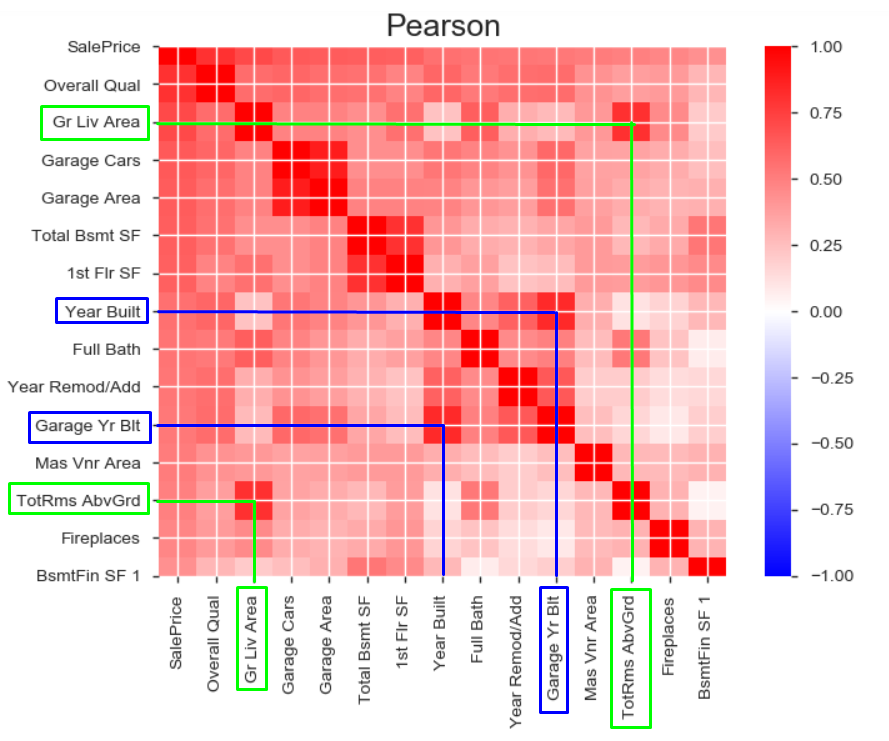

In [206]:
df = df.drop(['TotRms AbvGrd','Garage Yr Blt'], axis=1)
df

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,Fireplaces,BsmtFin SF 1
0,215000,6,1656,2.0,528.0,1080.0,1656,1960,1,1960,112.0,2,639.0
1,105000,5,896,1.0,730.0,882.0,896,1961,1,1961,0.0,0,468.0
2,172000,6,1329,1.0,312.0,1329.0,1329,1958,1,1958,108.0,0,923.0
3,244000,7,2110,2.0,522.0,2110.0,2110,1968,2,1968,0.0,2,1065.0
4,189900,5,1629,2.0,482.0,928.0,928,1997,2,1998,0.0,1,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,6,1003,2.0,588.0,1003.0,1003,1984,1,1984,0.0,0,819.0
2926,131000,5,902,2.0,484.0,864.0,902,1983,1,1983,0.0,0,301.0
2927,132000,5,970,0.0,0.0,912.0,970,1992,1,1992,0.0,0,337.0
2928,170000,5,1389,2.0,418.0,1389.0,1389,1974,1,1975,0.0,1,1071.0


#### Quando temos uma feature com baixa variação, ela não contribui muito para nosso modelo, já que varia pouco a informação. Por exemplo, uma feature onde todas as linhas possuem uma mesma informação, sua variação será zero. Para nosso modelo, estipulamos uma variação maior que 0.010 <br> When we have a feature with low variation, it does not contribute much to our model, since the information varies little. For example, a feature where all lines have the same information, their variation will be zero. For our model, we stipulate a variation greater than 0.010



In [207]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataScaler = scaler.fit(df)
dataScaler = scaler.transform(df)

dataScaler_df = pd.DataFrame(dataScaler, columns= df.columns)

print(dataScaler_df.var().sort_values(ascending = False))


df = df.loc[:,dataScaler_df.var() > 0.010]
df

Year Remod/Add    0.120875
Year Built        0.048035
Fireplaces        0.026238
Overall Qual      0.024580
Garage Cars       0.023138
Garage Area       0.020886
Full Bath         0.019109
Mas Vnr Area      0.012532
SalePrice         0.011585
Gr Liv Area       0.009070
1st Flr SF        0.006775
BsmtFin SF 1      0.006516
Total Bsmt SF     0.005200
dtype: float64


,SalePrice,Overall Qual,Garage Cars,Garage Area,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,Fireplaces
0,215000,6,2.0,528.0,1960,1,1960,112.0,2
1,105000,5,1.0,730.0,1961,1,1961,0.0,0
2,172000,6,1.0,312.0,1958,1,1958,108.0,0
3,244000,7,2.0,522.0,1968,2,1968,0.0,2
4,189900,5,2.0,482.0,1997,2,1998,0.0,1
...,...,...,...,...,...,...,...,...,...
2925,142500,6,2.0,588.0,1984,1,1984,0.0,0
2926,131000,5,2.0,484.0,1983,1,1983,0.0,0
2927,132000,5,0.0,0.0,1992,1,1992,0.0,0
2928,170000,5,2.0,418.0,1974,1,1975,0.0,1
